# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
#!pip install citipy


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
weather_response = requests.get(query_url)
weather_json = weather_response.json()

for city in cities:
    print(f"print log {city}")


print log nowa sol
print log talnakh
print log mingguang
print log khatanga
print log buariki
print log tuktoyaktuk
print log taolanaro
print log bouna
print log kapaa
print log tuatapere
print log guadalupe y calvo
print log upernavik
print log victoria
print log illoqqortoormiut
print log ahmadpur east
print log narsaq
print log ushuaia
print log zhangye
print log mecca
print log makasar
print log smolyaninovo
print log mersing
print log taunggyi
print log mitchell
print log sao filipe
print log saint-philippe
print log lompoc
print log saldanha
print log punta arenas
print log busselton
print log osinki
print log port alfred
print log brainerd
print log mataura
print log sitka
print log port moresby
print log alice springs
print log puerto ayora
print log tarudant
print log maceio
print log nanortalik
print log bengkulu
print log namibe
print log praya
print log marawi
print log fort nelson
print log hobyo
print log thompson
print log georgetown
print log merauke
print log saskylakh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.read_csv("../output_data/cities.csv")
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = weather_df.loc[weather_df["Humidity"]>101]
humidity_over_100

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
129,129,paita,0,PE,1558378778,290,-5.09,-81.11,62.6,17.22


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
clean_city_data = weather_df.drop(humidity_over_100.index)
clean_city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

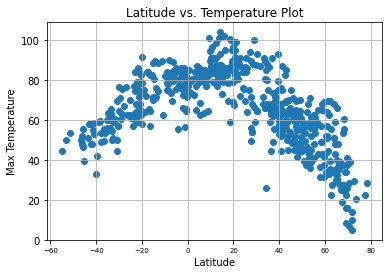

In [9]:
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Max Temp"]
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

## Latitude vs. Humidity Plot

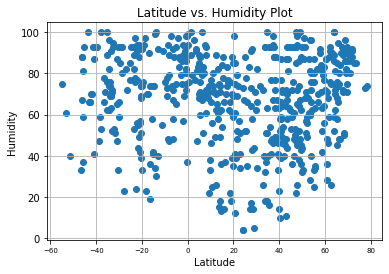

In [10]:
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Humidity"]
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

## Latitude vs. Cloudiness Plot

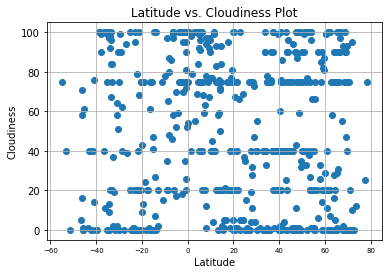

In [11]:
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Cloudiness"]
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

## Latitude vs. Wind Speed Plot

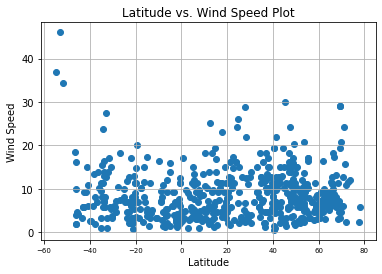

In [12]:
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Wind Speed"]
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

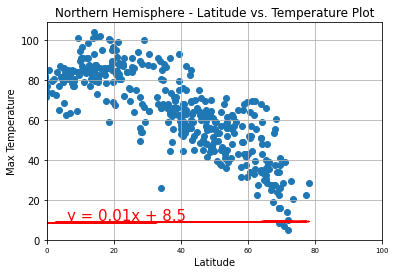

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Max Temp"]
plt.xlim(0, 100)
plt.title("Northern Hemisphere - Latitude vs. Temperature Plot")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

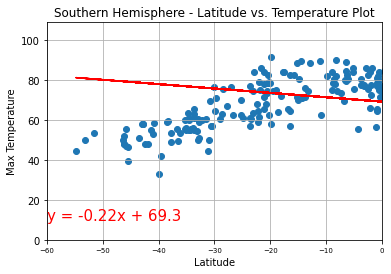

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Max Temp"]
plt.xlim(-60, 0)
plt.title("Southern Hemisphere - Latitude vs. Temperature Plot")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

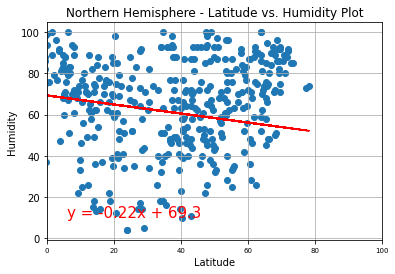

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(0, 100)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Humidity"]
plt.title("Northern Hemisphere - Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

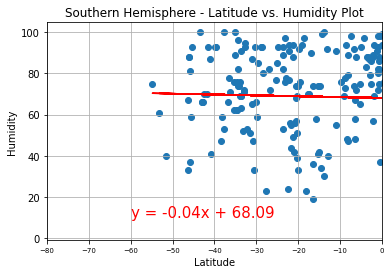

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
plt.xlim(-80, 0)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Humidity"]
plt.title("Southern Hemisphere - Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

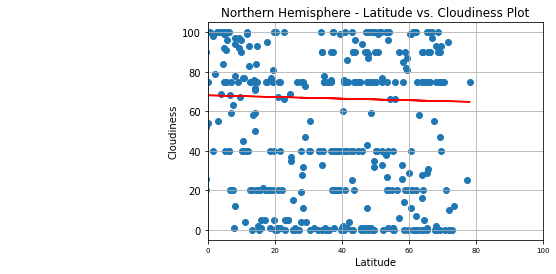

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
plt.xlim(0, 100)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Cloudiness"]
plt.title("Northern Hemisphere - Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

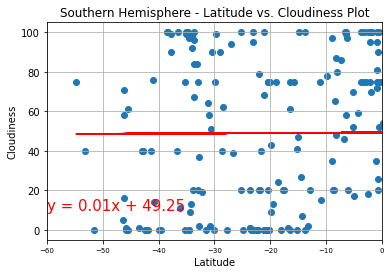

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
plt.xlim(-60, 0)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Cloudiness"]
plt.title("Southern Hemisphere - Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

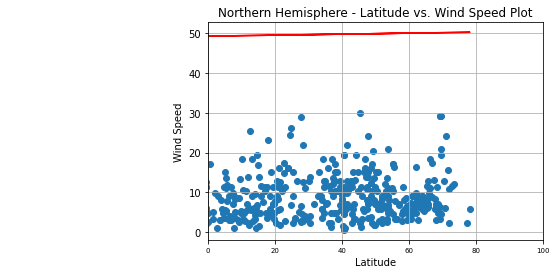

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
plt.xlim(0, 100)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Wind Speed"]
plt.title("Northern Hemisphere - Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

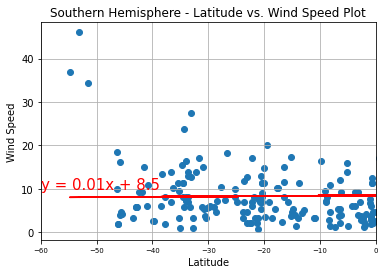

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-60,10),fontsize=15,color="red")
plt.xlim(-60, 0)
x_value = clean_city_data["Lat"]
y_value = clean_city_data["Wind Speed"]
plt.title("Southern Hemisphere - Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.tick_params(axis="x", which="major", labelsize=7)
plt.grid(True)
plt.scatter(x_value, y_value)

In [21]:
#three observable trends
# 1. I did not realize it was possible to have a humidity of 290....that just sounds awful. It is interesting that the max temp there is in the low 60's and also has a high wind speed. It would be interesting to see what the heat index is there.
#2. The closer to the equater you are the higher the temperature is. 
#3. It does not appear cloudiness has any relation to latitude